# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [25]:
base = pd.read_csv('M:\Website_Port\ebac-datascience\dados\demo01.csv')
base.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,0,0,0,0,1
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,1,0,0,0,0,0,0,0,0
2,2,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,0,0,0,0,1
3,3,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,4,1,0,1,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [26]:
y = base.mau
y

0       0
1       0
2       0
3       0
4       0
       ..
6765    1
6766    1
6767    1
6768    1
6769    1
Name: mau, Length: 6770, dtype: int64

In [27]:
X = base.drop('mau', axis = 1)
X

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,0,0,0,0,1
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,1,0,0,0,0,0,0,0,0
2,2,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,0,0,0,0,1
3,3,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,4,1,0,1,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,6765,1,0,1,1,34.857534,3.101370,1,1,1,...,1,1,0,0,0,0,0,0,0,1
6766,6766,1,0,1,0,54.109589,9.884932,1,0,0,...,1,1,0,0,0,0,0,0,0,1
6767,6767,1,0,1,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,0,0,0,0,0
6768,6768,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,0,0,0,0,1


In [28]:
X.shape

(6770, 28)

In [29]:
y.shape

(6770,)

In [30]:
X.dtypes

Unnamed: 0                                  int64
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
estado_civil_Separated                      int64
estado_civil_Single / not married           int64
estado_civil_Widow                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64
tipo_residencia_House / apartment           int64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [32]:
clf_dt = DecisionTreeClassifier(random_state = 100)

In [33]:
clf_dt = clf_dt.fit(X_train,y_train)
clf_dt

DecisionTreeClassifier(random_state=100)

In [34]:
y_train.value_counts()

0    4528
1     211
Name: mau, dtype: int64

[Text(0.6781658896074597, 0.975, 'Unnamed: 0 <= 6630.0\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Aprovados'),
 Text(0.6733531358098962, 0.925, 'tempo_emprego <= 4.955\ngini = 0.05\nsamples = 4646\nvalue = [4528, 118]\nclass = Aprovados'),
 Text(0.4602477816212964, 0.875, 'Unnamed: 0 <= 5031.5\ngini = 0.062\nsamples = 2540\nvalue = [2458, 82]\nclass = Aprovados'),
 Text(0.3236388930666266, 0.825, 'estado_civil_Widow <= 0.5\ngini = 0.048\nsamples = 1921\nvalue = [1874, 47]\nclass = Aprovados'),
 Text(0.18675740712889155, 0.775, 'idade <= 35.478\ngini = 0.041\nsamples = 1798\nvalue = [1760, 38]\nclass = Aprovados'),
 Text(0.10392540231613777, 0.725, 'idade <= 35.47\ngini = 0.063\nsamples = 521\nvalue = [504, 17]\nclass = Aprovados'),
 Text(0.09911264851857422, 0.675, 'tempo_emprego <= 0.684\ngini = 0.06\nsamples = 520\nvalue = [504, 16]\nclass = Aprovados'),
 Text(0.0168446382914724, 0.625, 'idade <= 28.522\ngini = 0.16\nsamples = 57\nvalue = [52, 5]\nclass = Aprovados')

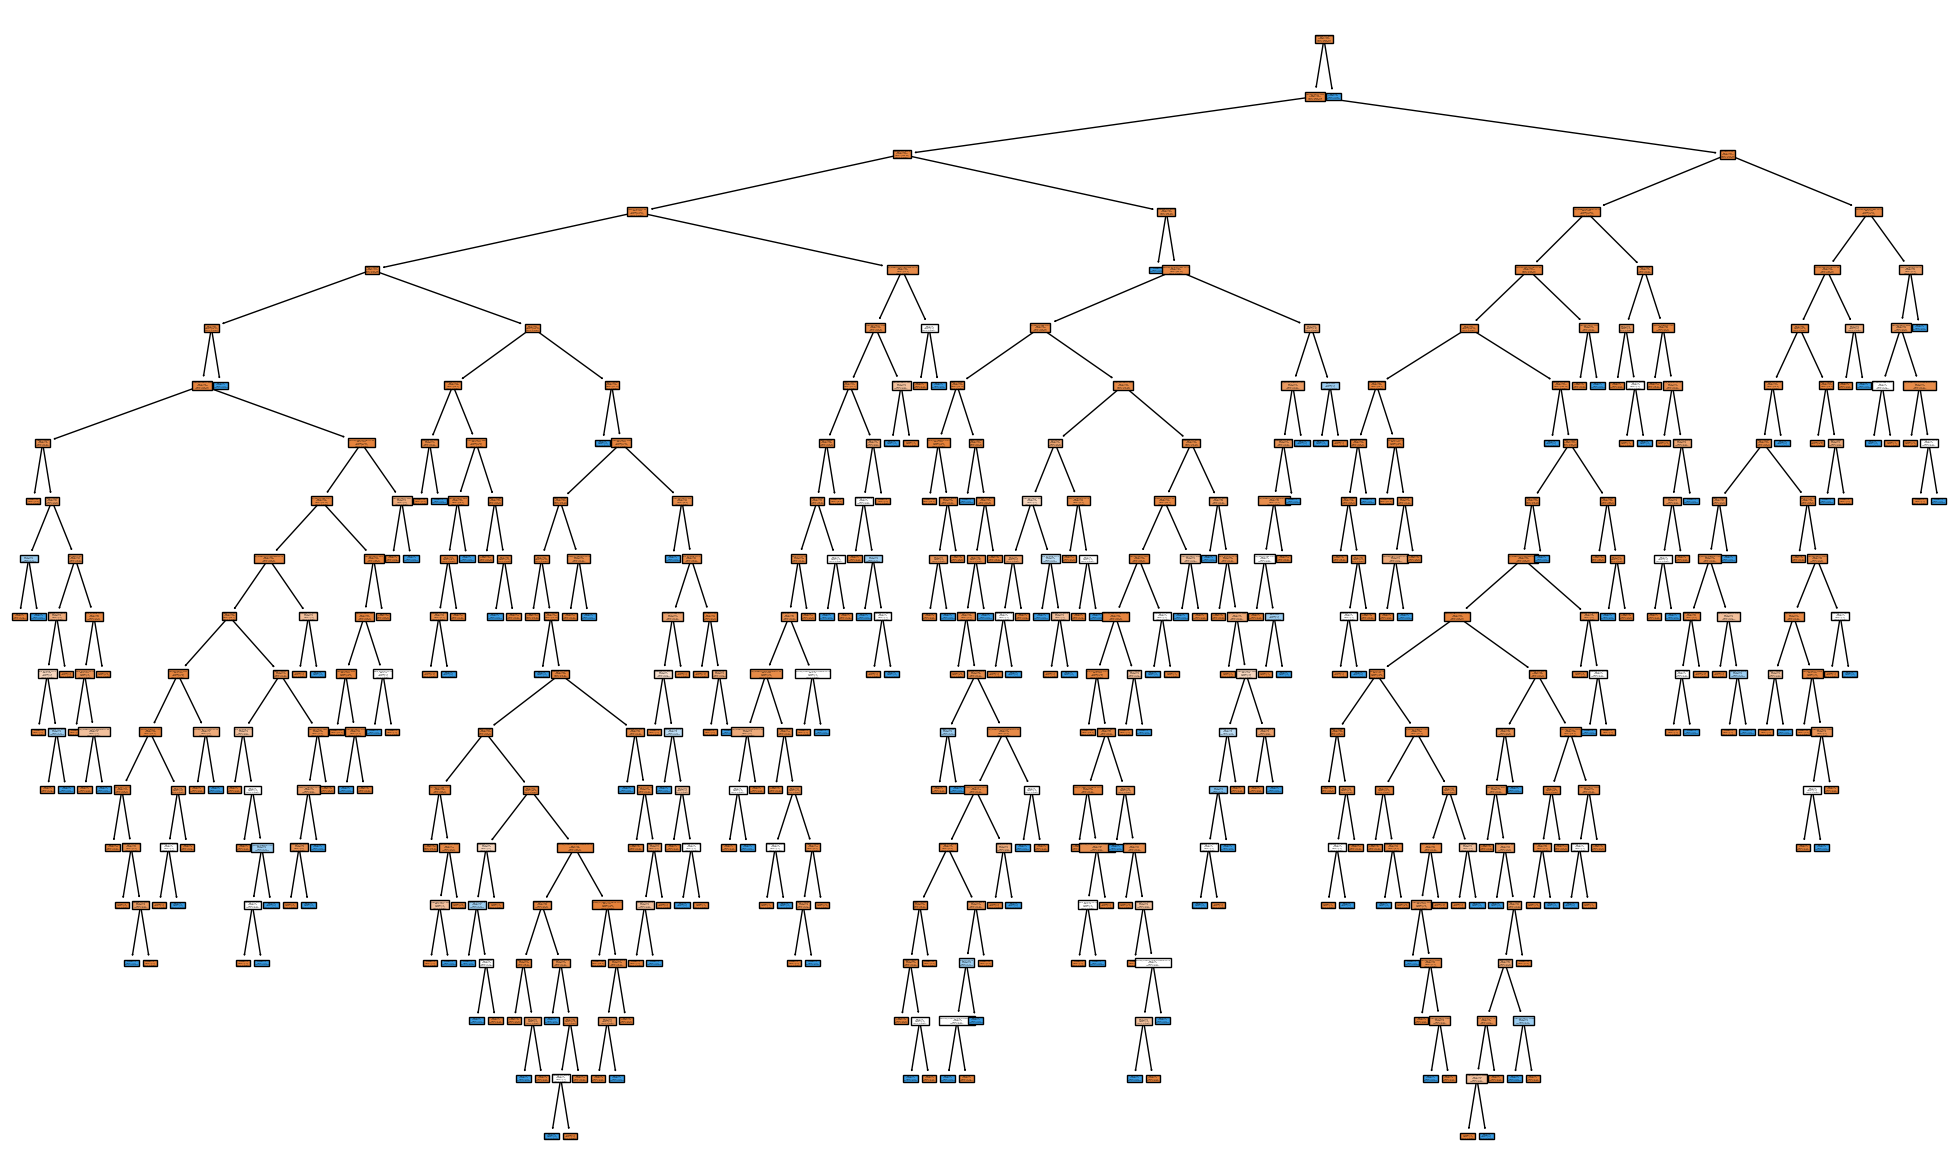

In [35]:
plt.figure(figsize = (25,15))
plot_tree(clf_dt,
          filled = True,
          class_names = ['Aprovados','Reprovados'],
          feature_names = X_train.columns)

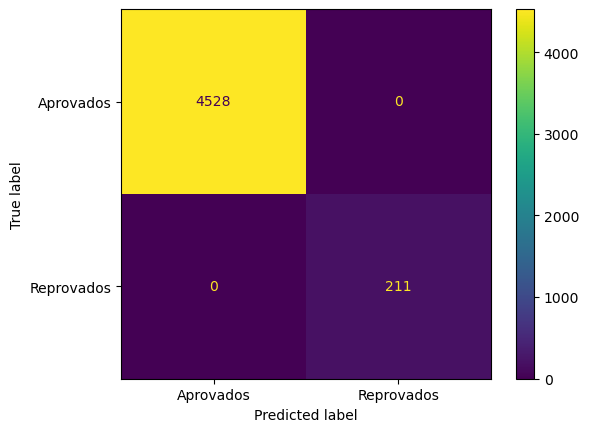

In [36]:
y_predict = clf_dt.predict(X_train)

cm = confusion_matrix(y_train, y_predict)

cm_plot_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

cm_plot_train.plot()

In [37]:
train_acc = accuracy_score(y_train, y_predict)
train_acc

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [38]:
y_test.value_counts()

0    1944
1      87
Name: mau, dtype: int64

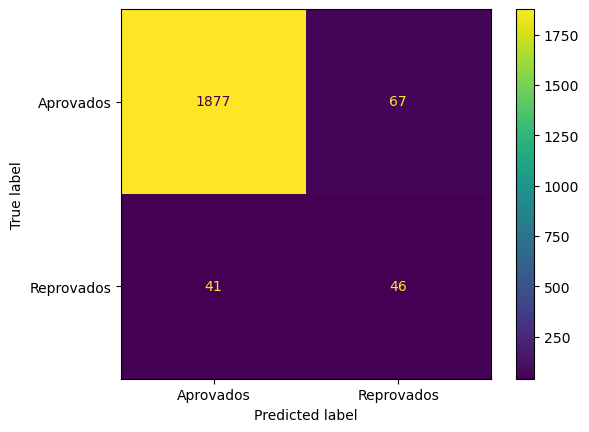

In [39]:
y_predict = clf_dt.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

cm_plot_test = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

cm_plot_test.plot()

In [40]:
test_acc = accuracy_score(y_test, y_predict)

In [41]:
print(f"ACURÁCIA TREINAMENTO:{train_acc}")
print(f"ACURÁCIA TESTE: {test_acc}")

ACURÁCIA TREINAMENTO:1.0
ACURÁCIA TESTE: 0.946824224519941


### 4 . Poda da árvore de decisão 

In [42]:
clf_dt2 = DecisionTreeClassifier(max_depth = 10,min_samples_leaf = 5,random_state = 123) 
clf_dt2 = clf_dt2.fit(X_train, y_train)
clf_dt2

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

[Text(0.637359118852459, 0.9545454545454546, 'Unnamed: 0 <= 6630.0\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Aprovados'),
 Text(0.6291623975409836, 0.8636363636363636, 'tempo_emprego <= 4.955\ngini = 0.05\nsamples = 4646\nvalue = [4528, 118]\nclass = Aprovados'),
 Text(0.39920594262295084, 0.7727272727272727, 'Unnamed: 0 <= 5031.5\ngini = 0.062\nsamples = 2540\nvalue = [2458, 82]\nclass = Aprovados'),
 Text(0.25665983606557374, 0.6818181818181818, 'estado_civil_Widow <= 0.5\ngini = 0.048\nsamples = 1921\nvalue = [1874, 47]\nclass = Aprovados'),
 Text(0.12397540983606557, 0.5909090909090909, 'idade <= 35.478\ngini = 0.041\nsamples = 1798\nvalue = [1760, 38]\nclass = Aprovados'),
 Text(0.05327868852459016, 0.5, 'tempo_emprego <= 0.684\ngini = 0.063\nsamples = 521\nvalue = [504, 17]\nclass = Aprovados'),
 Text(0.02459016393442623, 0.4090909090909091, 'idade <= 34.596\ngini = 0.185\nsamples = 58\nvalue = [52, 6]\nclass = Aprovados'),
 Text(0.01639344262295082, 0.318181818

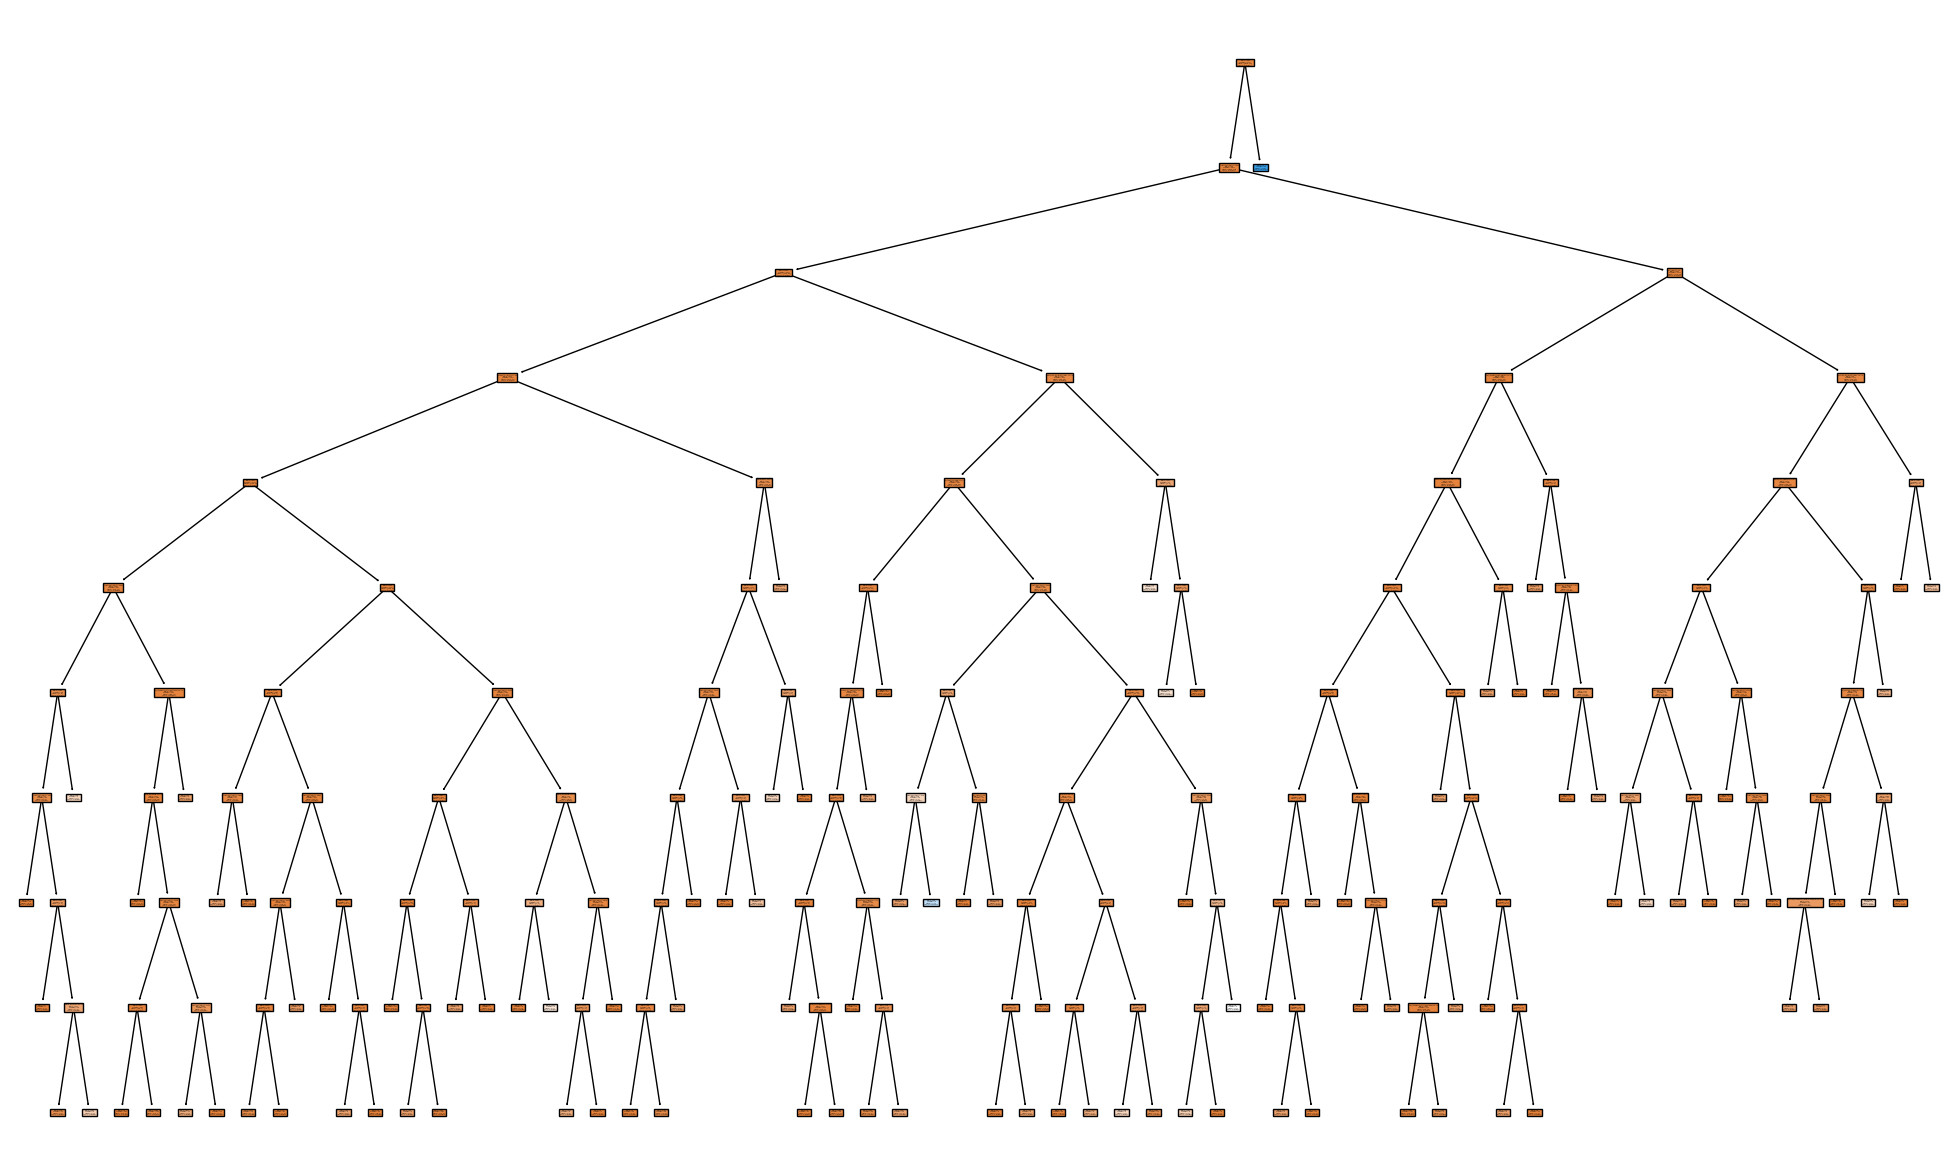

In [43]:
plt.figure(figsize = (25,15))
plot_tree(clf_dt2,
          filled = True,
          class_names = ['Aprovados','Reprovados'],
          feature_names = X_train.columns)

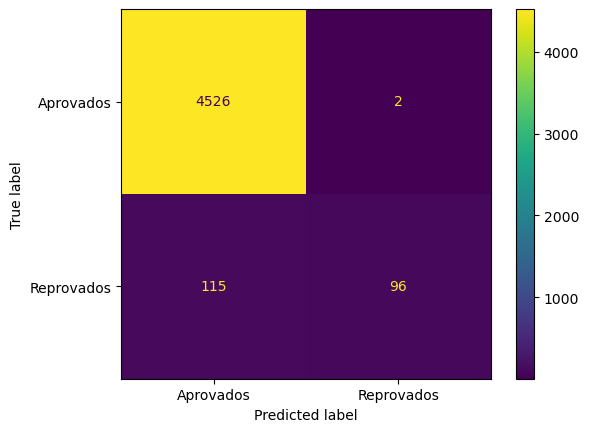

In [44]:
y_predict = clf_dt2.predict(X_train)

cm = confusion_matrix(y_train, y_predict)

cm_plot_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

cm_plot_train.plot()

In [45]:
train_acc = accuracy_score(y_train, y_predict)
train_acc

0.975311247098544

### 5. Todos os contratos como bons

In [46]:
#Modelo ingênuo

In [55]:
y.replace(1,0, inplace= True)

In [56]:
y.value_counts()

0    6770
Name: mau, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 100)

In [61]:
clf_dt2 = DecisionTreeClassifier(max_depth = 10,min_samples_leaf = 5,random_state = 123) 
clf_dt2 = clf_dt2.fit(X_train, y_train)
clf_dt2

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [67]:
y_predict2 = clf_dt2.predict(X_test)



In [68]:
accuracy_score(y_test, y_predict)

1.0